# Detección de Aneurismas Intracraneales

### Dayana Andrea Henao Arbeláez

### Aneurisma Cerebral

Un aneurisma cerebral o aneurisma intracraneal es una protuberancia o abombamiento en un vaso sanguíneo del cerebro. Se forma cuando una zona débil de la pared del vaso se dilata debido a la presión que ejerce la sangre que circula por él [1].

Los expertos creen que los aneurismas cerebrales se desarrollan y crecen precisamente por esa presión constante sobre un punto vulnerable de la pared vascular [1,2].

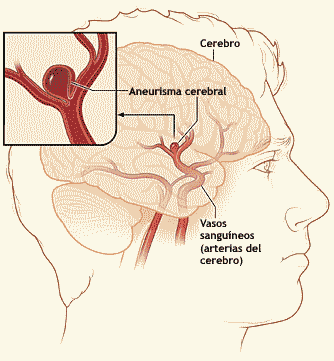

Cuando un aneurisma se rompe o presenta una fuga, provoca sangrado en el cerebro, conocido como accidente cerebrovascular hemorrágico [1]. Este tipo de evento es una emergencia médica potencialmente mortal. Se estima que los aneurismas intracraneales afectan a alrededor del 3% de la población mundial. Sin embargo, hasta un 50% se diagnostican solo después de su rotura. A nivel mundial, estos aneurismas causan cerca de 500.000 muertes al año, y aproximadamente la mitad de las víctimas son menores de 50 años [3].

A pesar de ello, los aneurismas cerebrales son relativamente comunes, y la mayoría no son graves, especialmente si son pequeños. En muchos casos, no se rompen ni causan síntomas, y suelen descubrirse de forma incidental durante estudios de imagen realizados por otras razones médicas [1,2].

Los radiólogos experimentados pueden detectar aneurismas en estudios de imagen cerebral, pero pueden pasar desapercibidos, sobre todo cuando las imágenes se obtienen con otros fines. Por eso, la detección automatizada, rápida y precisa de aneurismas en estudios cerebrales rutinarios podría ayudar a prevenir consecuencias devastadoras para los pacientes [3].

En cuanto al tratamiento, si un aneurisma no se ha roto, se evalúa cuidadosamente cada caso. Si el riesgo de tratamiento es menor que el riesgo de ruptura futura, puede recomendarse intervenir antes de que ocurra una rotura. En cambio, si el aneurisma se rompe, requiere atención médica inmediata para preservar la vida y reducir el daño cerebral [1]. 

### Objetivo del Proyecto:

Entrenar una red neuronal capaz de **detectar** y **localizar** aneurismas intracraneales a partir de imágenes médicas del cerebro.

El análisis utiliza el conjunto de datos de la competencia RSNA Intracranial Aneurysm Detection de Kaggle [3].

In [ ]:
# Se importan las librerías necesarias para el análisis y visualización de datos.


import pandas as pd # Pandas y numpy para manipulación de datos.
import numpy as np 
import seaborn as sns # Seaborn y matplotlib para la generación de gráficos estadísticos.
import matplotlib.pyplot as plt
import zipfile # Zipfile y os para la gestión de archivos comprimidos y rutas del sistema.
import os
import pydicom # Para la lectura y procesamiento de imágenes médicas en formato DICOM.
import math

### Variables presentes en el dataset para clasificación (Aneurisma Sí/No)

| **Columna** | **Descripción** |
|--------------|----------------|
| `SeriesInstanceUID` | Identificador único para cada serie de imágenes (escaneo). |
| `Modality` | Tipo o modo de imagen médica (por ejemplo, CTA, MRA, MRI, etc.). |
| `PatientAge` | Edad del paciente al momento del estudio. |
| `PatientSex` | Sexo del paciente (M/F). |
| `Left Infraclinoid Internal Carotid Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Infraclinoid Internal Carotid Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Left Supraclinoid Internal Carotid Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Supraclinoid Internal Carotid Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Left Middle Cerebral Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Middle Cerebral Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Anterior Communicating Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Left Anterior Cerebral Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Anterior Cerebral Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Left Posterior Communicating Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Right Posterior Communicating Artery` | Variable binaria: 1 si hay aneurisma en esta arteria, 0 si no. |
| `Basilar Tip` | Variable binaria: 1 si hay aneurisma en esta región, 0 si no. |
| `Other Posterior Circulation` | Variable binaria: 1 si hay aneurisma en otra región de la circulación posterior, 0 si no. |
| `Aneurysm Present` | Variable objetivo principal (target): 1 si existe algún aneurisma en cualquier parte del escaneo, 0 si no. |


In [ ]:
# Se carga el conjunto de datos de entrenamiento desde el archivo 'train.csv' en un DataFrame de pandas.
data=pd.DataFrame(pd.read_csv('train.csv'))
data

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4343,1.2.826.0.1.3680043.8.498.99915610493694667606...,62,Female,MRI T1post,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4344,1.2.826.0.1.3680043.8.498.99920680741054836990...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4345,1.2.826.0.1.3680043.8.498.99953513260518059135...,44,Female,CTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4346,1.2.826.0.1.3680043.8.498.99982144859397209076...,58,Female,MRI T2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Para obtener una visión general de la estructura del DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4348 entries, 0 to 4347
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   SeriesInstanceUID                           4348 non-null   object
 1   PatientAge                                  4348 non-null   int64 
 2   PatientSex                                  4348 non-null   object
 3   Modality                                    4348 non-null   object
 4   Left Infraclinoid Internal Carotid Artery   4348 non-null   int64 
 5   Right Infraclinoid Internal Carotid Artery  4348 non-null   int64 
 6   Left Supraclinoid Internal Carotid Artery   4348 non-null   int64 
 7   Right Supraclinoid Internal Carotid Artery  4348 non-null   int64 
 8   Left Middle Cerebral Artery                 4348 non-null   int64 
 9   Right Middle Cerebral Artery                4348 non-null   int64 
 10  Anterior Communicating A

In [ ]:
# Se generan estadísticas descriptivas básicas para las columnas numéricas del DataFrame.
data.describe()

,PatientAge,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,58.466881,0.017939,0.022539,0.075897,0.063937,0.050368,0.067617,0.083487,0.010580,0.012879,0.019779,0.023229,0.025299,0.025989,0.428473
std,15.841231,0.132746,0.148446,0.264864,0.244670,0.218728,0.251117,0.276648,0.102323,0.112768,0.139257,0.150648,0.157050,0.159121,0.494914
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Se calcula la suma de valores nulos por cada columna para identificar datos faltantes.
data.isnull().sum()

SeriesInstanceUID                             0
PatientAge                                    0
PatientSex                                    0
Modality                                      0
Left Infraclinoid Internal Carotid Artery     0
Right Infraclinoid Internal Carotid Artery    0
Left Supraclinoid Internal Carotid Artery     0
Right Supraclinoid Internal Carotid Artery    0
Left Middle Cerebral Artery                   0
Right Middle Cerebral Artery                  0
Anterior Communicating Artery                 0
Left Anterior Cerebral Artery                 0
Right Anterior Cerebral Artery                0
Left Posterior Communicating Artery           0
Right Posterior Communicating Artery          0
Basilar Tip                                   0
Other Posterior Circulation                   0
Aneurysm Present                              0
dtype: int64

In [ ]:
# Se listan los nombres de todas las columnas presentes en el DataFrame para tener una referencia de las variables disponibles.
data.columns

Index(['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality',
       'Left Infraclinoid Internal Carotid Artery',
       'Right Infraclinoid Internal Carotid Artery',
       'Left Supraclinoid Internal Carotid Artery',
       'Right Supraclinoid Internal Carotid Artery',
       'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
       'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
       'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
       'Right Posterior Communicating Artery', 'Basilar Tip',
       'Other Posterior Circulation', 'Aneurysm Present'],
      dtype='object')

In [ ]:
# Se cuenta la frecuencia de cada categoría en la columna 'Modality' para entender la distribución de los tipos de imágenes médicas.
data['Modality'].value_counts()

Modality
CTA           1808
MRA           1252
MRI T2         983
MRI T1post     305
Name: count, dtype: int64

### Descripción de las técnicas de imagen cerebral presentadas en el dataset

En la práctica clínica se utilizan diversas técnicas de imagen para evaluar el cerebro y su vasculatura, cada una basada en principios físicos distintos y orientada a detectar tipos específicos de alteraciones. Entre las más comunes se encuentran la Angiotomografía Computarizada (CTA), la Angiorresonancia Magnética (MRA), la Resonancia Magnética ponderada en T2 (MRI T2) y la Resonancia Magnética ponderada en T1 posterior a la administración de contraste (MRI T1 post-contraste).

**1. CTA (Angiotomografía Computarizada)**

La CTA es un estudio basado en tomografía computarizada que utiliza rayos X junto con la administración intravenosa de un medio de contraste yodado. Este examen está diseñado para visualizar de forma precisa las arterias y venas del cerebro, permitiendo reconstrucciones tridimensionales de la vasculatura.

Su uso principal es la detección de aneurismas, estenosis, malformaciones arteriovenosas, trombos y hemorragias asociadas a lesiones vasculares [4].

**2. MRA (Angiorresonancia Magnética)**

La MRA es una técnica de resonancia magnética enfocada en la visualización del árbol vascular cerebral, pero a diferencia de la CTA, no utiliza radiación y en muchas ocasiones no requiere contraste. Su principio se basa en el movimiento de la sangre dentro del campo magnético, lo cual permite resaltar los vasos sin necesidad de agentes externos.

Se emplea ampliamente en la evaluación no invasiva de aneurismas, estrechamientos arteriales y alteraciones del flujo sanguíneo, siendo una opción segura para pacientes que no pueden recibir contraste yodado [4,5].

**3. MRI T1 post-contraste**

Esta técnica corresponde a una secuencia T1 obtenida después de la administración de un contraste basado en gadolinio. El gadolinio modifica las propiedades magnéticas de los tejidos, haciendo que las áreas donde se acumula el contraste aparezcan más brillantes en la imagen.

El realce con contraste suele indicar ruptura o alteración de la barrera hematoencefálica, por lo que esta técnica es fundamental para identificar tumores y metástasis, abscesos, procesos inflamatorios intensos, malformaciones vasculares [6].

**4. MRI T2 (Resonancia Magnética ponderada en T2)**

La secuencia T2 es una de las modalidades más utilizadas en resonancia magnética. En este tipo de imágenes, el líquido cefalorraquídeo, el edema y los tejidos con alto contenido de agua aparecen brillantes, lo que la hace particularmente útil para identificar: lesiones inflamatorias, tumores, infartos en etapas subagudas, infecciones, edemas y alteraciones de la sustancia blanca.

La MRI T2 no está orientada al estudio de los vasos, sino al análisis estructural y patológico del parénquima cerebral [7].



### Distribución de edades, sexo y modalidad de imagen en los pacientes

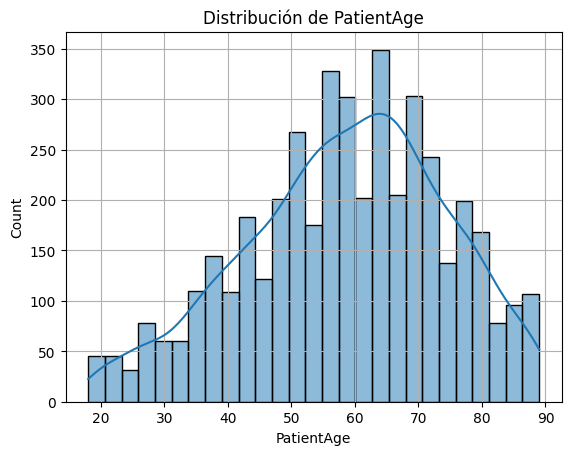

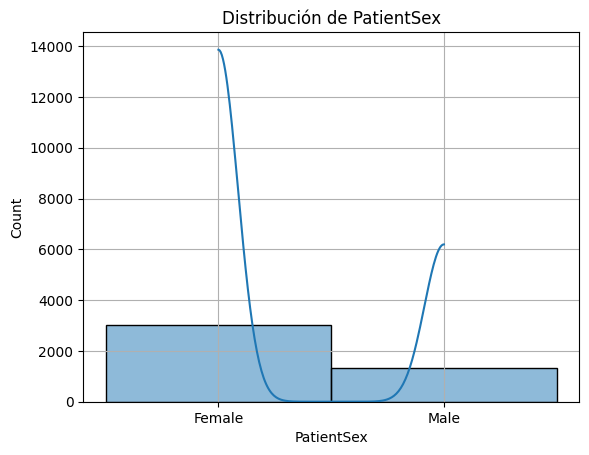

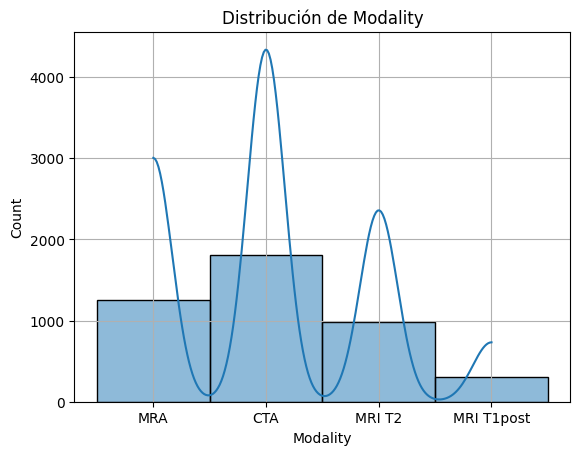

In [ ]:
# Se iteran las variables de interés ('PatientAge', 'PatientSex', 'Modality') para generar histogramas con estimación de densidad de kernel (KDE).
# Esto permite visualizar la distribución de edad, sexo y modalidad de imagen en la población del estudio.
for i in ['PatientAge', 'PatientSex', 'Modality']:
    sns.histplot(data[i], kde=True)
    plt.title(f'Distribución de {i}')
    plt.xlabel(i)
    plt.grid()
    plt.show()

In [ ]:
# Se observa una fila específica tener un ejemplo concreto de los datos de un paciente.
data.iloc[2]

SeriesInstanceUID                             1.2.826.0.1.3680043.8.498.10005158603912009425...
PatientAge                                                                                   58
PatientSex                                                                                 Male
Modality                                                                                    CTA
Left Infraclinoid Internal Carotid Artery                                                     0
Right Infraclinoid Internal Carotid Artery                                                    0
Left Supraclinoid Internal Carotid Artery                                                     0
Right Supraclinoid Internal Carotid Artery                                                    0
Left Middle Cerebral Artery                                                                   0
Right Middle Cerebral Artery                                                                  0
Anterior Communicating Artery           

In [ ]:
# Se seleccionan columnas específicas de interés (edad, sexo y presencia general de aneurisma).
# Luego, se itera sobre ellas para imprimir la distribución de frecuencias de cada una.
cols = [data.columns[2], data.columns[3], data.columns[-1]]

for j in cols:
    print(f"\nDistribución de {j}:")
    print(data.groupby(j).size().reset_index(name='counts'))


Distribución de PatientSex:
  PatientSex  counts
0     Female    3005
1       Male    1343

Distribución de Modality:
     Modality  counts
0         CTA    1808
1         MRA    1252
2  MRI T1post     305
3      MRI T2     983

Distribución de Aneurysm Present:
   Aneurysm Present  counts
0                 0    2485
1                 1    1863


Debido a que, como se mencionó anteriormente, las modalidades especializadas para la detección de aneurismas son CTA y MRA, y además estas representan el mayor número de muestras disponibles en el conjunto de datos, en el presente trabajo se tendrán en cuenta únicamente estas dos modalidades para el desarrollo del proyecto.

In [ ]:
# Se definen códigos de color hexadecimales para estandarizar la visualización gráfica (rojo y azul).
red = '#d62728'  # tab:red
blue  = '#1f77b4'  # tab:blue

In [ ]:
# Se filtra el dataset para conservar únicamente las modalidades 'CTA' y 'MRA', descartando otras técnicas.
# El resultado filtrado se guarda en un nuevo archivo CSV 'train_MRA_CTA.csv'.
data_filtered=data[data['Modality'].isin(['CTA','MRA'])].copy()
data_filtered.to_csv('train_MRA_CTA.csv', index=False)

In [ ]:
# Se carga el nuevo dataset filtrado para continuar con el análisis sobre las modalidades seleccionadas.
data=pd.read_csv('train_MRA_CTA.csv')
data

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,1.2.826.0.1.3680043.8.498.99892990973227842737...,73,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3056,1.2.826.0.1.3680043.8.498.99895756899933461331...,39,Female,CTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3057,1.2.826.0.1.3680043.8.498.99920680741054836990...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3058,1.2.826.0.1.3680043.8.498.99953513260518059135...,44,Female,CTA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Se repite el análisis de distribución para las columnas de interés (edad, sexo, aneurisma)
# sobre el dataset ya filtrado, para observar cómo cambiaron las proporciones.
cols = [data.columns[2], data.columns[3], data.columns[-1]]

for j in cols:
    print(f"\nDistribución de {j}:")
    print(data.groupby(j).size().reset_index(name='counts'))


Distribución de PatientSex:
  PatientSex  counts
0     Female    2075
1       Male     985

Distribución de Modality:
  Modality  counts
0      CTA    1808
1      MRA    1252

Distribución de Aneurysm Present:
   Aneurysm Present  counts
0                 0    1532
1                 1    1528


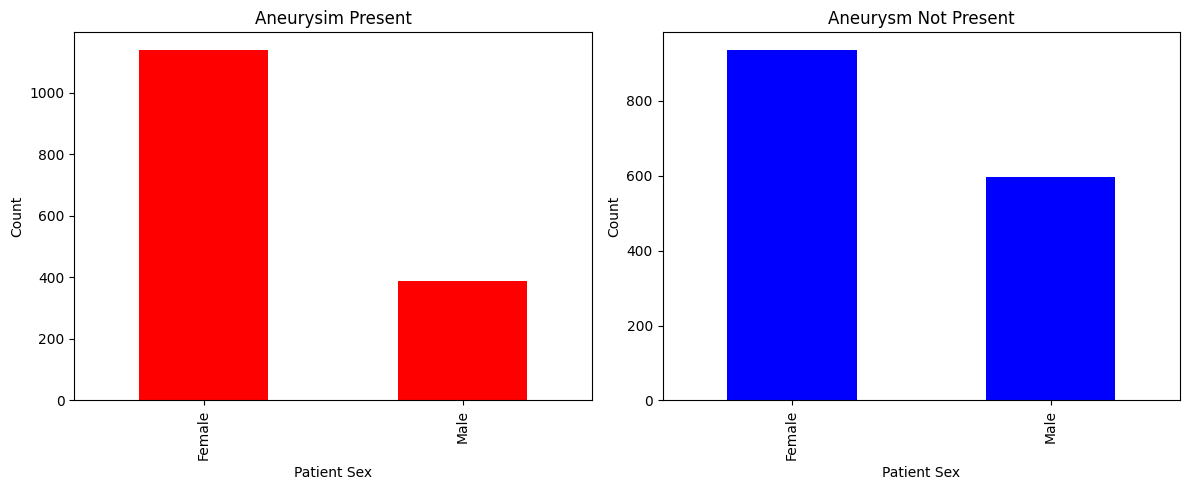

In [ ]:
# Se crean gráficos de barras comparativos para visualizar la distribución del sexo de los pacientes,
# separando aquellos que presentan aneurisma (izquierda, rojo) de los que no (derecha, azul).
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

data[data['Aneurysm Present'] == 1]['PatientSex'].value_counts().plot(
    kind='bar', ax=axes[0], color='red'
)
axes[0].set_title('Aneurysim Present')
axes[0].set_xlabel('Patient Sex')
axes[0].set_ylabel('Count')


data[data['Aneurysm Present'] == 0]['PatientSex'].value_counts().plot(
    kind='bar', ax=axes[1], color='blue'
)
axes[1].set_title('Aneurysm Not Present')
axes[1].set_xlabel('Patient Sex')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.show()

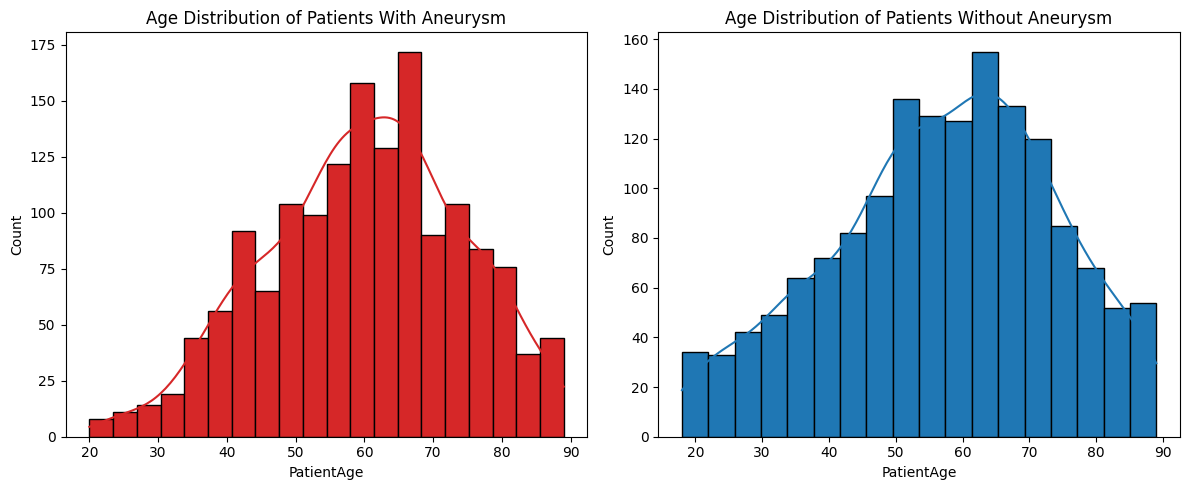

In [ ]:
# Se generan histogramas para comparar la distribución de edades entre pacientes con aneurisma (rojo)
# y pacientes sin aneurisma (azul), permitiendo observar tendencias demográficas relacionadas con la edad.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    data=data[data['Aneurysm Present'] == 1],
    x='PatientAge',
    kde=True,
    ax=axes[0],
    color= red, alpha=1
)
axes[0].set_title('Age Distribution of Patients With Aneurysm')
axes[0].set_xlabel('PatientAge')
axes[0].set_ylabel('Count')

sns.histplot(
    data=data[data['Aneurysm Present'] == 0],
    x='PatientAge',
    kde=True,
    ax=axes[1],
    color= blue, alpha=1
)
axes[1].set_title('Age Distribution of Patients Without Aneurysm')
axes[1].set_xlabel('PatientAge')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Distribución de edades de las pacientes mujeres

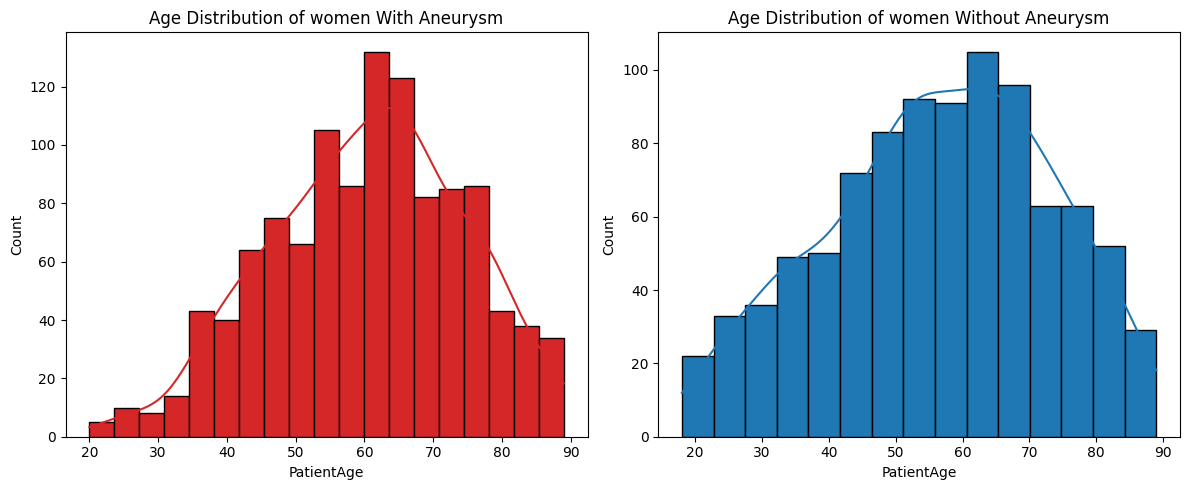

In [ ]:
# Se realiza un análisis específico de la distribución de edad para el subgrupo de mujeres,
# comparando nuevamente los casos positivos (con aneurisma) frente a los negativos.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data[(data['Aneurysm Present'] == 1) & (data['PatientSex'] == 'Female')]['PatientAge'],
    kde=True,
    ax=axes[0],
    color= red, alpha=1
)
axes[0].set_title('Age Distribution of women With Aneurysm')
axes[0].set_xlabel('PatientAge')
axes[0].set_ylabel('Count')

sns.histplot(
    data=data[(data['Aneurysm Present'] == 0) & (data['PatientSex'] == 'Female')]['PatientAge'],
    kde=True,
    ax=axes[1],
    color= blue, alpha=1
)
axes[1].set_title('Age Distribution of women Without Aneurysm')
axes[1].set_xlabel('PatientAge')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Distribución de edades de los pacientes hombres

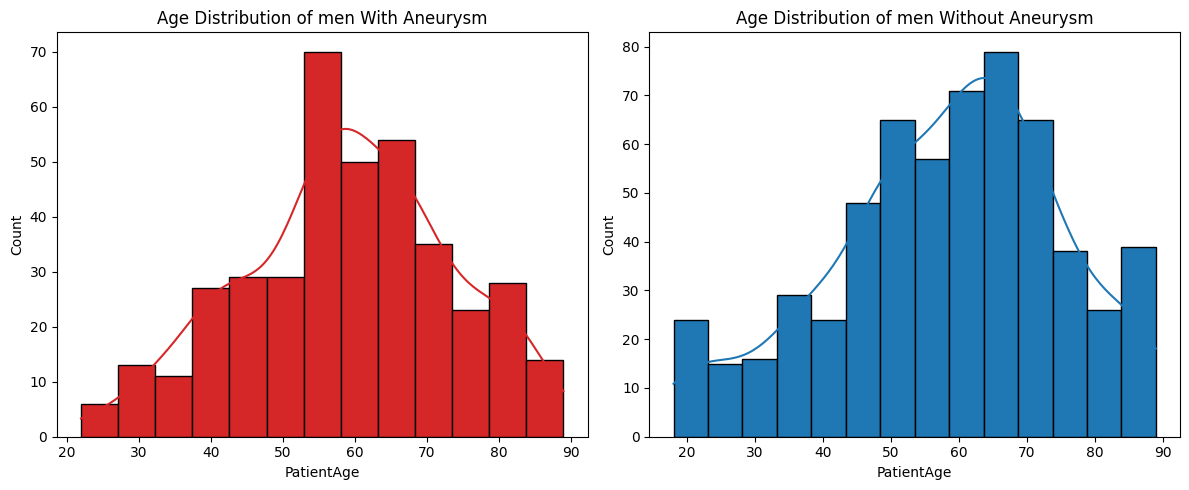

In [ ]:
# Se realiza el mismo análisis de distribución de edad pero enfocado en el subgrupo de hombres,
# permitiendo contrastar las diferencias de edad de aparición entre sexos.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data[(data['Aneurysm Present'] == 1) & (data['PatientSex'] == 'Male')]['PatientAge'],
    kde=True,
    ax=axes[0],
    color= red, alpha=1
)
axes[0].set_title('Age Distribution of men With Aneurysm')
axes[0].set_xlabel('PatientAge')
axes[0].set_ylabel('Count')

sns.histplot(
    data=data[(data['Aneurysm Present'] == 0) & (data['PatientSex'] == 'Male')]['PatientAge'],
    kde=True,
    ax=axes[1],
    color= blue, alpha=1
)
axes[1].set_title('Age Distribution of men Without Aneurysm')
axes[1].set_xlabel('PatientAge')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Visualización de Imágenes 

Las imágenes utilizadas en este proyecto provienen de un conjunto de datos alojado en Kaggle que se distribuye bajo términos de uso específicos y restricciones de licencia. Por esta razón, no es posible incluir ni almacenar directamente dichas imágenes dentro del repositorio público de GitHub. Únicamente se emplearon para la fase de análisis y entrenamiento del modelo en un entorno local, respetando las condiciones de acceso establecidas por los autores del dataset.

### Ejemplo de las imágenes MRA

In [ ]:
# Se definen las rutas del archivo ZIP original y la carpeta de destino para la extracción.
zip_path = "/home/dayana-henao/Escritorio/rsna-intracranial-aneurysm-detection.zip"
base_extract_path = "/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion"

# Se selecciona el UID del primer paciente del dataset como ejemplo para visualizar una MRA.
uid = data['SeriesInstanceUID'][0]

# Se crea un directorio específico para almacenar las imágenes extraídas de este paciente.
uid_folder = os.path.join(base_extract_path, uid)
os.makedirs(uid_folder, exist_ok=True)

# Se abre el archivo ZIP y se extraen únicamente los archivos que coinciden con el UID seleccionado.
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if uid in member:
            zip_ref.extract(member, uid_folder)

print("Extracción completada para el UID:", uid)

Extracción completada para el UID: 1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647


In [ ]:
# Se define el UID específico a procesar y la ruta donde se encuentran sus imágenes extraídas.
uid = '1.2.826.0.1.3680043.8.498.10004044428023505108375152878107656647'

uid_folder = f"/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion/{uid}/series/{uid}"

slices = []
# Se listan todos los archivos DICOM (.dcm) en la carpeta.
files = [f for f in os.listdir(uid_folder) if f.endswith(".dcm")]

# Se itera sobre cada archivo para leerlo y extraer su número de instancia (orden anatómico) y la matriz de píxeles.
for f in files:
    path = os.path.join(uid_folder, f)
    ds = pydicom.dcmread(path)
    
    # Se intenta obtener el 'InstanceNumber' para ordenar correctamente las imágenes.
    try:
        instance_num = int(ds.InstanceNumber)
    except AttributeError:
        instance_num = 0 # Valor por defecto en caso de error
        
    slices.append((instance_num, ds.pixel_array))

# Se ordenan las imágenes basándose en el número de instancia para reconstruir la secuencia volumétrica correcta.
slices.sort(key=lambda x: x[0])

# Se extraen las matrices de píxeles ya ordenadas para su visualización.
imgs = [s[1] for s in slices]

print(f"Total de imágenes ordenadas: {len(imgs)}")


# Se configura una cuadrícula de subplots para mostrar todas las imágenes de la serie.
n_imgs = len(imgs)
cols = 10  # número de columnas por fila
rows = math.ceil(n_imgs / cols)

# Se crea la figura y se muestran las imágenes en escala de grises.
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n_imgs:
        ax.imshow(imgs[i], cmap='gray')
        ax.set_title(f"{i+1}", fontsize=8)
        ax.axis('off')
    else:
        ax.axis('off')  

plt.tight_layout()
plt.show()

Total de imágenes ordenadas: 188


'n_imgs = len(imgs)\ncols = 10  # número de columnas\nrows = math.ceil(n_imgs / cols)\n\n# Crear figura con subplots\nfig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))\naxes = axes.flatten()\n\nfor i, ax in enumerate(axes):\n    if i < n_imgs:\n        ax.imshow(imgs[i], cmap=\'gray\')\n        ax.set_title(f"{i+1}", fontsize=8)\n        ax.axis(\'off\')\n    else:\n        ax.axis(\'off\')  \n\nplt.tight_layout()\nplt.show()'

In [ ]:
import cv2
import numpy as np

# Función auxiliar para preparar la imagen para video: normalización y conversión a uint8.
def prepare_for_video(img):
    # Se crea una copia para no alterar los datos originales.
    img_copy = img.astype(np.float32)

    # Se normaliza la imagen al rango 0-1 y luego se escala a 0-255.
    img_norm = (img_copy - img_copy.min()) / (img_copy.max() - img_copy.min())
    img_uint8 = (img_norm * 255).astype(np.uint8)
    return img_uint8

# Se obtienen las dimensiones de las imágenes.
height, width = imgs[0].shape[:2]

# Se inicializa el escritor de video con codec mp4v y 10 frames por segundo.
video = cv2.VideoWriter(
    'MRA.mp4',
    cv2.VideoWriter_fourcc(*'mp4v'),
    10,
    (width, height)
)

# Se procesa cada imagen de la secuencia, se convierte a formato BGR (requerido por OpenCV) y se añade al video.
for img in imgs:
    frame = prepare_for_video(img)
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
    video.write(frame_bgr)

# Se libera el recurso de video al finalizar.
video.release()

### Ejemplo de las imágenes con CTA

In [ ]:
# Se repite el proceso de extracción, esta vez seleccionando un paciente con modalidad CTA (índice 2).
zip_path = "/home/dayana-henao/Escritorio/rsna-intracranial-aneurysm-detection.zip"
base_extract_path = "/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion"

# Ejemplo CTA
uid = data['SeriesInstanceUID'][2]

# Se crea la carpeta correspondiente al UID.
uid_folder = os.path.join(base_extract_path, uid)
os.makedirs(uid_folder, exist_ok=True)

# Se extraen los archivos del ZIP para este paciente.
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if uid in member:
            zip_ref.extract(member, uid_folder)

print("Extracción completada para el UID:", uid)

Extracción completada para el UID: 1.2.826.0.1.3680043.8.498.10005158603912009425635473100344077317


In [ ]:
# Se define el UID del paciente CTA y la ruta de sus imágenes.
uid = '1.2.826.0.1.3680043.8.498.10005158603912009425635473100344077317'

uid_folder = f"/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion/{uid}/series/{uid}"

slices = []
files = [f for f in os.listdir(uid_folder) if f.endswith(".dcm")]

# Se leen y ordenan las imágenes DICOM de la serie CTA.
for f in files:
    path = os.path.join(uid_folder, f)
    ds = pydicom.dcmread(path)
    
    try:
        instance_num = int(ds.InstanceNumber)
    except AttributeError:
        instance_num = 0 
        
    slices.append((instance_num, ds.pixel_array))

slices.sort(key=lambda x: x[0])
imgs = [s[1] for s in slices]

print(f"Total de imágenes ordenadas: {len(imgs)}")


# Se visualiza la serie completa de imágenes CTA en una cuadrícula.
n_imgs = len(imgs)
cols = 10  
rows = math.ceil(n_imgs / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < n_imgs:
        ax.imshow(imgs[i], cmap='gray')
        ax.set_title(f"{i+1}", fontsize=8)
        ax.axis('off')
    else:
        ax.axis('off')  

plt.tight_layout()
plt.show()

Total de imágenes ordenadas: 276


'n_imgs = len(imgs)\ncols = 10  # número de columnas\nrows = math.ceil(n_imgs / cols)\n\n# Crear figura con subplots\nfig, axes = plt.subplots(rows, cols, figsize=(15, rows * 1.5))\naxes = axes.flatten()\n\nfor i, ax in enumerate(axes):\n    if i < n_imgs:\n        ax.imshow(imgs[i], cmap=\'gray\')\n        ax.set_title(f"{i+1}", fontsize=8)\n        ax.axis(\'off\')\n    else:\n        ax.axis(\'off\')  \n\nplt.tight_layout()\nplt.show()'

In [ ]:
# Se genera un archivo de video 'CTA.mp4' a partir de la secuencia de imágenes CTA procesadas.
video = cv2.VideoWriter(
    'CTA.mp4',
    cv2.VideoWriter_fourcc(*'mp4v'),
    10,
    (width, height)
)

for img in imgs:
    frame = prepare_for_video(img)
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
    video.write(frame_bgr)

video.release()

## Variables presentes en el dataset para localización del aneurisma 



| **Variable** | **Descripción** |
|---------------|------------------|
| `SeriesInstanceUID` | Identificador único de la serie de imágenes (conjunto de cortes DICOM que conforman un estudio). Corresponde al mismo campo en `train.csv`. |
| `SOPInstanceUID` | Identificador único de una imagen específica dentro de una serie. Cada valor corresponde a un archivo `.dcm`. |
| `coordinates` | Coordenadas (x, y) cercanas al centro del aneurisma dentro de la imagen, expresadas en píxeles. |
| `location` | Descripción textual de la ubicación anatómica del aneurisma. |


In [ ]:
# Se carga el archivo 'train_localizers.csv' que contiene las coordenadas y etiquetas de ubicación de los aneurismas.
datalocalizers=pd.read_csv('train_localizers.csv')
datalocalizers

,SeriesInstanceUID,SOPInstanceUID,coordinates,location
0,1.2.826.0.1.3680043.8.498.10005158603912009425...,1.2.826.0.1.3680043.8.498.10775329348174902199...,"{'x': 258.3621186176837, 'y': 261.359900373599}",Other Posterior Circulation
1,1.2.826.0.1.3680043.8.498.10022796280698534221...,1.2.826.0.1.3680043.8.498.53868409774237283281...,"{'x': 194.87253141831238, 'y': 178.32675044883...",Right Middle Cerebral Artery
2,1.2.826.0.1.3680043.8.498.10023411164590664678...,1.2.826.0.1.3680043.8.498.24186535344744886473...,"{'x': 189.23979878597123, 'y': 209.19184886465...",Right Middle Cerebral Artery
3,1.2.826.0.1.3680043.8.498.10030095840917973694...,1.2.826.0.1.3680043.8.498.75217084841854214544...,"{'x': 208.2805049088359, 'y': 229.78962131837307}",Right Infraclinoid Internal Carotid Artery
4,1.2.826.0.1.3680043.8.498.10034081836061566510...,1.2.826.0.1.3680043.8.498.71237104731452368587...,"{'x': 249.86745590416498, 'y': 220.623044646393}",Anterior Communicating Artery
...,...,...,...,...
2249,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.10885430363476327277...,"{'x': 204.2324966974901, 'y': 216.4332892998679}",Right Middle Cerebral Artery
2250,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.75978746530527925899...,"{'x': 153.42160206895431, 'y': 188.45547208042...",Right Middle Cerebral Artery
2251,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.88559536225248716051...,"{'x': 364.01486988847586, 'y': 195.33085501858...",Left Middle Cerebral Artery
2252,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.41770479778255354615...,"{'x': 177.48698884758363, 'y': 210.55762081784...",Right Middle Cerebral Artery


In [ ]:
# Se filtra el dataset de localizadores para mantener solo aquellos registros que corresponden a los pacientes
# presentes en el dataset principal (que ya fue filtrado por modalidad MRA/CTA).
datalocalizers_filtered = datalocalizers[datalocalizers['SeriesInstanceUID'].isin(data['SeriesInstanceUID'])].copy()
datalocalizers_filtered

,SeriesInstanceUID,SOPInstanceUID,coordinates,location
0,1.2.826.0.1.3680043.8.498.10005158603912009425...,1.2.826.0.1.3680043.8.498.10775329348174902199...,"{'x': 258.3621186176837, 'y': 261.359900373599}",Other Posterior Circulation
1,1.2.826.0.1.3680043.8.498.10022796280698534221...,1.2.826.0.1.3680043.8.498.53868409774237283281...,"{'x': 194.87253141831238, 'y': 178.32675044883...",Right Middle Cerebral Artery
2,1.2.826.0.1.3680043.8.498.10023411164590664678...,1.2.826.0.1.3680043.8.498.24186535344744886473...,"{'x': 189.23979878597123, 'y': 209.19184886465...",Right Middle Cerebral Artery
3,1.2.826.0.1.3680043.8.498.10030095840917973694...,1.2.826.0.1.3680043.8.498.75217084841854214544...,"{'x': 208.2805049088359, 'y': 229.78962131837307}",Right Infraclinoid Internal Carotid Artery
4,1.2.826.0.1.3680043.8.498.10034081836061566510...,1.2.826.0.1.3680043.8.498.71237104731452368587...,"{'x': 249.86745590416498, 'y': 220.623044646393}",Anterior Communicating Artery
...,...,...,...,...
2249,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.10885430363476327277...,"{'x': 204.2324966974901, 'y': 216.4332892998679}",Right Middle Cerebral Artery
2250,1.2.826.0.1.3680043.8.498.99887675554378211308...,1.2.826.0.1.3680043.8.498.75978746530527925899...,"{'x': 153.42160206895431, 'y': 188.45547208042...",Right Middle Cerebral Artery
2251,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.88559536225248716051...,"{'x': 364.01486988847586, 'y': 195.33085501858...",Left Middle Cerebral Artery
2252,1.2.826.0.1.3680043.8.498.99892390884723813599...,1.2.826.0.1.3680043.8.498.41770479778255354615...,"{'x': 177.48698884758363, 'y': 210.55762081784...",Right Middle Cerebral Artery


In [ ]:
# Se guarda el dataset de localizadores filtrado en un nuevo archivo CSV.
datalocalizers_filtered.to_csv('train_localizers_MRA_CTA.csv', index=False)

In [ ]:
# Se cuenta cuántos aneurismas (registros en localizers) tiene cada paciente (SeriesInstanceUID).
# Esto permite identificar pacientes con múltiples aneurismas o múltiples cortes con aneurisma visible.
counts = datalocalizers_filtered['SeriesInstanceUID'].value_counts().reset_index()
counts.columns = ['SeriesInstanceUID', 'num_aneurysms']

counts.head(10)

,SeriesInstanceUID,num_aneurysms
0,1.2.826.0.1.3680043.8.498.76928456732082261565...,5
1,1.2.826.0.1.3680043.8.498.11292203154407642658...,5
2,1.2.826.0.1.3680043.8.498.89343864244736172393...,5
3,1.2.826.0.1.3680043.8.498.99028068919105186302...,5
4,1.2.826.0.1.3680043.8.498.31629979420404800139...,5
5,1.2.826.0.1.3680043.8.498.11527986509512933171...,5
6,1.2.826.0.1.3680043.8.498.49582199677226918946...,4
7,1.2.826.0.1.3680043.8.498.12903717039792869467...,4
8,1.2.826.0.1.3680043.8.498.16386250344855221757...,4
9,1.2.826.0.1.3680043.8.498.75544849977603411738...,4


In [ ]:
# Se selecciona el UID del paciente con mayor número de registros de aneurismas para su visualización detallada.
counts['SeriesInstanceUID'][0]

'1.2.826.0.1.3680043.8.498.76928456732082261565048056589908832861'

### Visualización de imagenes que contienen varios aneurismas

In [ ]:
# Se extraen las imágenes correspondientes al paciente seleccionado (con múltiples aneurismas) desde el archivo ZIP.
zip_path = "/home/dayana-henao/Escritorio/rsna-intracranial-aneurysm-detection.zip"
base_extract_path = "/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion"

uid = counts['SeriesInstanceUID'][0]

uid_folder = os.path.join(base_extract_path, uid)
os.makedirs(uid_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for member in zip_ref.namelist():
        if uid in member:
            zip_ref.extract(member, uid_folder)

print("Extracción completada para el UID:", uid)

Extracción completada para el UID: 1.2.826.0.1.3680043.8.498.76928456732082261565048056589908832861


In [ ]:
# Se filtran y muestran las filas del dataset de localizadores correspondientes a este paciente específico.
fila = datalocalizers_filtered[datalocalizers_filtered['SeriesInstanceUID'] == uid]
fila

,SeriesInstanceUID,SOPInstanceUID,coordinates,location
1782,1.2.826.0.1.3680043.8.498.76928456732082261565...,1.2.826.0.1.3680043.8.498.67084626663293613420...,"{'x': 290.16693810096154, 'y': 233.1446153846154}",Left Supraclinoid Internal Carotid Artery
1783,1.2.826.0.1.3680043.8.498.76928456732082261565...,1.2.826.0.1.3680043.8.498.30645582958642852129...,"{'x': 250.41409435145619, 'y': 233.7121523137735}",Right Supraclinoid Internal Carotid Artery
1784,1.2.826.0.1.3680043.8.498.76928456732082261565...,1.2.826.0.1.3680043.8.498.68281060740956754661...,"{'x': 250.02992809227626, 'y': 233.66132990372...",Right Supraclinoid Internal Carotid Artery
1785,1.2.826.0.1.3680043.8.498.76928456732082261565...,1.2.826.0.1.3680043.8.498.67232253978278339666...,"{'x': 292.03770733173076, 'y': 233.1446153846154}",Left Supraclinoid Internal Carotid Artery
1786,1.2.826.0.1.3680043.8.498.76928456732082261565...,1.2.826.0.1.3680043.8.498.39269494589383669304...,"{'x': 291.1023227163462, 'y': 230.33846153846156}",Left Supraclinoid Internal Carotid Artery


In [ ]:
# Se inspecciona el UID de una imagen específica (SOPInstanceUID) dentro de los registros del paciente.
datalocalizers_filtered['SOPInstanceUID'][993]

'1.2.826.0.1.3680043.8.498.13176478997534649879394518662623875274'

In [ ]:
# Se utiliza la librería 'ast' para evaluar la cadena de texto que contiene las coordenadas y extraer el valor de 'x'.
import ast
ast.literal_eval(datalocalizers_filtered['coordinates'][993])['x']

247.28734691914718

In [ ]:
# Se define un rango de índices para visualizar una secuencia de imágenes consecutivas donde aparece el aneurisma.
indices = range(1782, 1787)

uid = counts['SeriesInstanceUID'][0]

# Se crea una figura con subplots para mostrar las imágenes seleccionadas.
fig, axes = plt.subplots(1, len(indices), figsize=(15, 4))

for ax, i in zip(axes, indices):
    # Se obtiene el nombre del archivo DICOM correspondiente al índice.
    a = datalocalizers_filtered['SOPInstanceUID'][i]
    path_dcm = f"/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion/{uid}/series/{uid}/{a}.dcm"

    # Se carga la imagen DICOM.
    dcm = pydicom.dcmread(path_dcm)
    img = dcm.pixel_array

    # Se extraen y parsean las coordenadas (x, y) del aneurisma.
    coords = ast.literal_eval(datalocalizers_filtered['coordinates'][i])
    x, y = coords['x'], coords['y']

    # Se muestra la imagen y se superpone un punto rojo en la ubicación del aneurisma.
    ax.imshow(img, cmap='gray')
    ax.plot(x, y, 'r.', markersize=6)
    ax.set_title(f"Imagen {i}", fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

'indices = range(1782, 1787)\n\nuid = counts[\'SeriesInstanceUID\'][0]\n\n# Crear figura con subplots (una fila de 5 columnas)\nfig, axes = plt.subplots(1, len(indices), figsize=(15, 4))\n\nfor ax, i in zip(axes, indices):\n    a = datalocalizers_filtered[\'SOPInstanceUID\'][i]\n    path_dcm = f"/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion/{uid}/series/{uid}/{a}.dcm"\n\n    # Cargar imagen DICOM\n    dcm = pydicom.dcmread(path_dcm)\n    img = dcm.pixel_array\n\n    # Extraer coordenadas\n    coords = ast.literal_eval(datalocalizers_filtered[\'coordinates\'][i])\n    x, y = coords[\'x\'], coords[\'y\']\n\n    # Mostrar imagen y punto\n    ax.imshow(img, cmap=\'gray\')\n    ax.plot(x, y, \'r.\', markersize=6)\n    ax.set_title(f"Imagen {i}", fontsize=10)\n    ax.axis(\'off\')\n\nplt.tight_layout()\nplt.show()'

In [ ]:
# Se selecciona una imagen específica para visualizarla en detalle junto con la información de metadatos DICOM.
a=datalocalizers_filtered['SOPInstanceUID'][1782]
path_dcm = f"/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion/{uid}/series/{uid}/{a}.dcm"

# Se carga el archivo DICOM.
dcm = pydicom.dcmread(path_dcm)

# Se imprimen los metadatos del archivo DICOM.
print(dcm)

# Se visualiza la imagen con el marcador del aneurisma.
plt.imshow(dcm.pixel_array, cmap='gray')
plt.plot(ast.literal_eval(datalocalizers_filtered['coordinates'][1782])['x'], ast.literal_eval(datalocalizers_filtered['coordinates'][1782])['y'], 'r.')
plt.title("Imagen DICOM")
plt.axis('off')
plt.show()

'a=datalocalizers_filtered[\'SOPInstanceUID\'][1782]\n# Ruta a uno de los archivos .dcm\npath_dcm = f"/home/dayana-henao/Escritorio/Deteccion-de-aneurismas-intracraneales/Extraccion_Visualizacion/{uid}/series/{uid}/{a}.dcm"\n\n# Cargar el archivo\ndcm = pydicom.dcmread(path_dcm)\n\n# Mostrar información del archivo\nprint(dcm)\n\n# Visualizar la imagen\nplt.imshow(dcm.pixel_array, cmap=\'gray\')\nplt.plot(ast.literal_eval(datalocalizers_filtered[\'coordinates\'][1782])[\'x\'], ast.literal_eval(datalocalizers_filtered[\'coordinates\'][1782])[\'y\'], \'r.\')\nplt.title("Imagen DICOM")\nplt.axis(\'off\')\nplt.show()'

### Zoom a la imagen para visualizar el aneurisma 

In [ ]:
# Se extraen las coordenadas del aneurisma para realizar un recorte (zoom) alrededor de la zona de interés.
coords = ast.literal_eval(datalocalizers_filtered['coordinates'][1782])
x = int(coords['x'])
y = int(coords['y'])

# Se define el tamaño de la ventana de zoom (50 píxeles alrededor del centro).
zoom_size = 50

# Se calculan los límites del recorte asegurando que no excedan las dimensiones de la imagen.
x_min = max(0, x - zoom_size)
x_max = min(img.shape[1], x + zoom_size)
y_min = max(0, y - zoom_size)
y_max = min(img.shape[0], y + zoom_size)

# Se recorta la región de interés de la imagen original.
zoom_region = img[y_min:y_max, x_min:x_max]

# Se muestra la región recortada (zoom).
plt.imshow(zoom_region, cmap='gray')
plt.title(f"Zoom alrededor del punto ({x}, {y})")
plt.axis('off')
plt.show()

'coords = ast.literal_eval(datalocalizers_filtered[\'coordinates\'][1782])\nx = int(coords[\'x\'])\ny = int(coords[\'y\'])\n\n# Tamaño de la ventana de zoom \nzoom_size = 50\n\n# Definir límites, asegurando que estén dentro de la imagen\nx_min = max(0, x - zoom_size)\nx_max = min(img.shape[1], x + zoom_size)\ny_min = max(0, y - zoom_size)\ny_max = min(img.shape[0], y + zoom_size)\n\n# Recortar la región de interés\nzoom_region = img[y_min:y_max, x_min:x_max]\n\n# Mostrar el zoom\nplt.imshow(zoom_region, cmap=\'gray\')\nplt.title(f"Zoom alrededor del punto ({x}, {y})")\nplt.axis(\'off\')\nplt.show()'

In [ ]:
# Se recalculan las coordenadas locales del aneurisma relativas a la región recortada.
x_local = x - x_min
y_local = y - y_min

# Se muestra el zoom con el punto rojo indicando la ubicación exacta del aneurisma.
plt.imshow(zoom_region, cmap='gray')
plt.plot(x_local, y_local, 'r.', markersize=6)
plt.title(f"Zoom alrededor del punto ({x}, {y})")
plt.axis('off')
plt.show()

'x_local = x - x_min\ny_local = y - y_min\n\n# Mostrar zoom con punto\nplt.imshow(zoom_region, cmap=\'gray\')\nplt.plot(x_local, y_local, \'r.\', markersize=6)\nplt.title(f"Zoom alrededor del punto ({x}, {y})")\nplt.axis(\'off\')\nplt.show()'

## Referencias 

[1] Mayo Clinic. Aneurisma cerebral: síntomas y causas. Recuperado el 31 de octubre de 2025, de https://www.mayoclinic.org/es/diseases-conditions/brain-aneurysm/symptoms-causes/syc-20361483

[2] American Stroke Association. Let’s Talk About Brain Aneurysms. Recuperado el 17 de octubre de 2025, de https://www.stroke.org/es/help-and-support/resource-library/lets-talk-about-stroke/brain-aneurysms

[3] RSNA Intracranial Aneurysm Detection. Datos de la competencia de Kaggle. Kaggle, Inc. Disponible en: https://www.kaggle.com/competitions/rsna-intracranial-aneurysm-detection/data?select=train_localizers.csv
 (consultado el 17 de octubre).

 [4] AdminAPacs. (2020, 24 abril). TAC y RM: ¿en qué se diferencian estas técnicas imagenológicas? Blog de Teleradiología | Actualidad. https://www.actualpacs.com/blog/2017/07/13/diferencias-tac-rm/

[5] Angiografía por resonancia magnética: MedlinePlus enciclopedia médica. Recuperado el 15 de noviembre. https://medlineplus.gov/spanish/ency/article/007269.htm

[6] Baba, Y., & Jones, J. (2009). T1 weighted image. Radiopaedia.org. https://doi.org/10.53347/rid-5852

[7] MXR Imaging Blog | T1 vs. T2 MRI Imaging: Guide To Understanding The Primary Difference | MXR. (s. f.). https://mxrimaging.com/Blogs/T1-vs-T2-MRI-Imaging

[8] OpenAI. (2025). Asistencia en la redacción y análisis para el proyecto sobre detección de aneurismas intracraneales con deep learning, mediante ChatGPT (versión GPT-5). Recuperado de https://chat.openai.com